In [1]:
### Importing Important Packages.
import numpy as np
class Perceptron(object):
  def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state
  def predict(self, X):
      return np.where(self.net_input(X) >= 0, 1, -1)
  def fit(self, X, y):
    rand = np.random.RandomState(self.random_state)
    self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for x, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(x))
        self.weights[1:] += update * x
        self.weights[0] += update
        errors += int(update != 0.0)
        self.errors_.append(errors)
      return self
  def net_input(self, X):
    z = np.dot(X, self.weights[1:]) + self.weights[0]
    return z
    

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

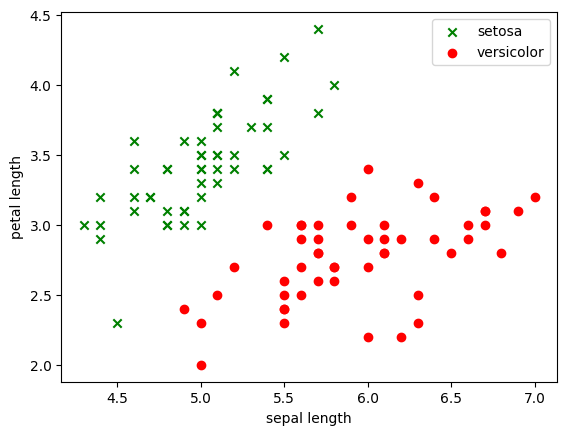

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

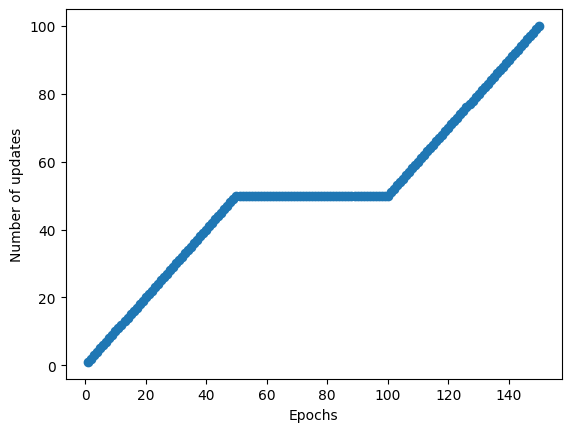

In [4]:
per = Perceptron(learning_rate=0.5, n_iter=100, random_state=1)
per.fit(X, y)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**MultiLayer Perceptron using Keras**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from numpy import loadtxt
import pandas as pd

In [6]:
# dataset = loadtxt('/content/Churn_Modelling.csv',delimiter=',')
data = pd.read_csv('C:/Users/vipul/OneDrive/Desktop/dl dataset/Churn_Modelling.csv')
x = data.iloc[:,6:13]
y=data.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7000, 7) (3000, 7) (7000,) (3000,)


In [7]:
model=Sequential()
model.add(Dense(32,input_dim=7,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [8]:
plot_model(model,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=50,batch_size=10,verbose=1)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 799.3477 - accuracy: 0.7529
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 6.5363 - accuracy: 0.7936
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6734 - accuracy: 0.7970
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5062 - accuracy: 0.7977
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5044 - accuracy: 0.7974
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.7976
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.79

In [11]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print('Model Loss: %.2f, Accuracy:%.2f' %((loss*100),(accuracy*100)))

94/94 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7933
Model Loss: 50.94, Accuracy:79.33
